# objective
#### Applying K-means over a given real estate data and discuss results

In [1]:
#dependencies
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading of dataset
data = pd.read_excel('Realstate_dataset.xlsx')

In [3]:
#understanding what features we working with
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [4]:
# Selecting relevant features for clustering
features = data[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]

In [5]:
# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [6]:
# Choosing the number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

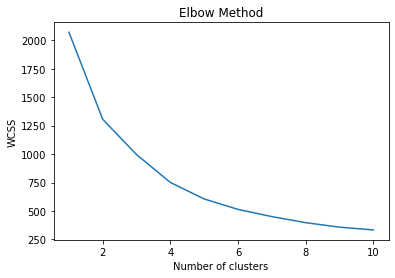

In [7]:
# Ploting the Elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()

In [8]:
# Based on the Elbow curve, we choose the optimal K value and train the final model
k = 3  # Replace with your chosen K
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
data['Cluster'] = kmeans.fit_predict(scaled_features)


In [9]:
#Exploring the clusters and analyze the results
print(data.head())

   No  X1 transaction date  X2 house age  \
0   1          2012.916667          32.0   
1   2          2012.916667          19.5   
2   3          2013.583333          13.3   
3   4          2013.500000          13.3   
4   5          2012.833333           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  Cluster  
0     24.98298     121.54024                        37.9        0  
1     24.98034     121.53951                        42.2        0  
2     24.98746     121.54391                        47.3      

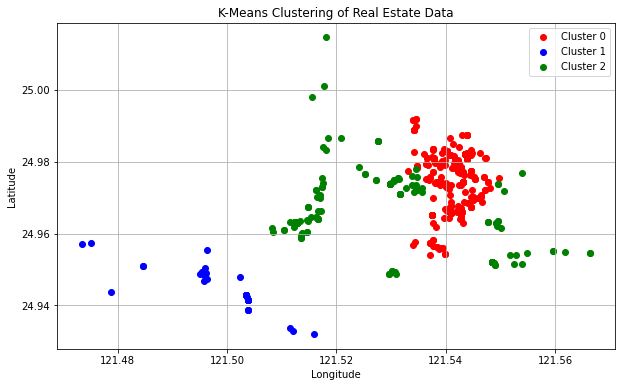

In [10]:
cluster_colors = {0: 'red', 1: 'blue', 2: 'green'}

# Scatterplot of latitude vs longitude, color-coded by cluster
plt.figure(figsize=(10, 6))
for cluster_id, color in cluster_colors.items():
    cluster_data = data[data['Cluster'] == cluster_id]
    plt.scatter(cluster_data['X6 longitude'], cluster_data['X5 latitude'], c=color, label=f'Cluster {cluster_id}')

plt.title('K-Means Clustering of Real Estate Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()

# Result Discussion:

### <font color='Red'> Cluster 0 (Red):

- **Distance to MRT:** Properties in Cluster 0 have a moderate distance to the nearest MRT station, with an average of approximately 469.4 meters. This indicates a reasonable level of accessibility to public transportation for residents in this cluster.

- **Price:** Houses in Cluster 0 have a wide range of prices, with an average unit price of approximately 46.26. Prices are moderate, making them attractive for budget-conscious buyers.

- **Age of House:** The houses in Cluster 0 tend to be relatively older, with an average age of approximately 21.36 years. Buyers in this cluster might be interested in more affordable options but may consider renovation or remodeling.

### <font color='Blue'>Cluster 1 (Blue):

- **Distance to MRT:** Cluster 1 includes properties that are relatively closer to MRT stations, with an average distance of approximately 272.74 meters. This cluster offers excellent access to public transportation, which can be a significant convenience for residents.

- **Price:** Similar to Cluster 0, houses in Cluster 1 also have a wide range of prices, with an average unit price of approximately 45.45. Prices are moderate, and buyers may prioritize accessibility and convenience.

- **Age of House:** Cluster 1 consists of houses with an average age of approximately 29.75 years, indicating older properties. Buyers in this cluster may prioritize proximity to convenience stores and public transportation over the age of the houses.

### <font color='Green'> Cluster 2 (Green):

- **Distance to MRT:** Properties in Cluster 2 have a moderate average distance of approximately 383.78 meters to the nearest MRT station. While not as close as Cluster 1, they still offer good accessibility to public transportation.

- **Price:** Properties in this cluster also have a wide range of prices, with an average unit price of approximately 47.97. The relatively newer age of houses may contribute to the slightly higher prices in this cluster.

- **Age of House:** Properties in this cluster are relatively newer, with an average age of approximately 11.65 years. Buyers may find newer homes appealing for their potentially modern features and lower maintenance requirements.